
<div class="note">
    <p style="margin-top: 0; margin-bottom: 0;">
        <img style="margin-top: 0; margin-bottom: 0; height: 2em;" class="inline-block mr-2 no-fancybox"
            src="https://upload.wikimedia.org/wikipedia/commons/3/38/Jupyter_logo.svg" alt="">
        This page is based on a Jupyter notebook.
<a href="./mpi_parallel_run_kirsch.ipynb" download="mpi_parallel_run_kirsch.ipynb"><img class="no-fancybox" style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;" src="https://img.shields.io/static/v1?label=Download:&message=mpi_parallel_run_kirsch.ipynb&color=blue" /></a>
<a href="https://gitlab.opengeosys.org/ogs/ogs/-/blob/master/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch.py"><img src="https://img.shields.io/static/v1?label=Source:&message=mpi_parallel_run_kirsch.py&color=brightgreen" class="no-fancybox"
        style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;" /></a>
<a href="https://binder.opengeosys.org/v2/gh/bilke/binder-ogs-requirements/6.5.6-0.7.0?urlpath=git-pull%3Frepo=https://gitlab.opengeosys.org/ogs/ogs%26urlpath=lab/tree/ogs/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch.py%26branch=master%26depth=1">
    <img class="no-fancybox" style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;"
        src="https://img.shields.io/static/v1?label=&message=Launch notebook&color=5c5c5c&logo=" />
</a></p></div>



In [1]:
import os
from pathlib import Path
from subprocess import run

import gmsh
import matplotlib.pyplot as plt
import numpy as np
import ogstools as ot
from mesh import MeshGenerator

### Run *"Solving Kirsch's problem using the release nodal force approach"* with MPI parallel computing

In [2]:
out_dir = Path(os.environ.get("OGS_TESTRUNNER_OUT_DIR", "_out"))
if not out_dir.exists():
    out_dir.mkdir(parents=True)
mesh_dir = Path(out_dir, "Mesh")

#### 1. Mesh generation

In [3]:
if not gmsh.isInitialized():
    gmsh.initialize()

gmsh.model.add("Mesh")

mesh_generator = MeshGenerator(gmsh_model=gmsh.model)
mesh_generator.generate_meshes(out_dir=mesh_dir, order=2)

gmsh.finalize()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Circle)
Info    : [ 20%] Meshing curve 2 (Circle)
Info    : [ 30%] Meshing curve 3 (Line)
Info    : [ 40%] Meshing curve 4 (Line)
Info    : [ 50%] Meshing curve 5 (Line)
Info    : [ 60%] Meshing curve 6 (Line)
Info    : [ 70%] Meshing curve 7 (Line)
Info    : [ 80%] Meshing curve 8 (Line)
Info    : [ 90%] Meshing curve 9 (Line)
Info    : [100%] Meshing curve 10 (Line)
Info    : Done meshing 1D (Wall 0.00416439s, CPU 0.004895s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Transfinite)
Info    : [ 40%] Meshing surface 2 (Plane, Delaunay)
Info    : [ 70%] Meshing surface 3 (Plane, Delaunay)
Info    : Done meshing 2D (Wall 0.00911088s, CPU 0.009226s)
Info    : 1469 nodes 2051 elements
Info    : Writing '/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/Mesh/domain.msh'...
Info    : Done writing '/var/lib/gitlab-runner/builds/e3EQ9HiK/0

[0] info: Reordering nodes... 
[0] info: Corrected 1674 elements.
[0] info: VTU file written.
Create quadratic mesh for /var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/Mesh/left.vtu
OGS_BIN_PATH:  None .

OGS wheel:  ModuleSpec(name='ogs', loader=<_frozen_importlib_external.SourceFileLoader object at 0x78ea01d809b0>, origin='/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/site-packages/ogs/__init__.py', submodule_search_locations=['/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/site-packages/ogs']) .

OGS in PATH:  ['/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/bin/ogs', '/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/bin/ogs'] .

Please remove OGS from PATH.



[0] info: Create a quadratic order mesh
[0] info: Save the new mesh into a file
Create quadratic mesh for /var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/Mesh/bottom.vtu
OGS_BIN_PATH:  None .

OGS wheel:  ModuleSpec(name='ogs', loader=<_frozen_importlib_external.SourceFileLoader object at 0x78ea01d809b0>, origin='/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/site-packages/ogs/__init__.py', submodule_search_locations=['/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/site-packages/ogs']) .

OGS in PATH:  ['/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/bin/ogs', '/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/bin/ogs'] .

Please remove OGS from PATH.



[0] info: Create a quadratic order mesh
[0] info: Save the new mesh into a file
Create quadratic mesh for /var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/Mesh/arc.vtu
OGS_BIN_PATH:  None .

OGS wheel:  ModuleSpec(name='ogs', loader=<_frozen_importlib_external.SourceFileLoader object at 0x78ea01d809b0>, origin='/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/site-packages/ogs/__init__.py', submodule_search_locations=['/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/site-packages/ogs']) .

OGS in PATH:  ['/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/bin/ogs', '/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/bin/ogs'] .

Please remove OGS from PATH.



[0] info: Create a quadratic order mesh
[0] info: Save the new mesh into a file
Create quadratic mesh for /var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/Mesh/domain.vtu
OGS_BIN_PATH:  None .

OGS wheel:  ModuleSpec(name='ogs', loader=<_frozen_importlib_external.SourceFileLoader object at 0x78ea01d809b0>, origin='/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/site-packages/ogs/__init__.py', submodule_search_locations=['/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/site-packages/ogs']) .

OGS in PATH:  ['/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/bin/ogs', '/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/bin/ogs'] .

Please remove OGS from PATH.



[0] info: Create a quadratic order mesh
[0] info: Save the new mesh into a file
Create quadratic mesh for /var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/Mesh/right.vtu
OGS_BIN_PATH:  None .

OGS wheel:  ModuleSpec(name='ogs', loader=<_frozen_importlib_external.SourceFileLoader object at 0x78ea01d809b0>, origin='/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/site-packages/ogs/__init__.py', submodule_search_locations=['/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/site-packages/ogs']) .

OGS in PATH:  ['/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/bin/ogs', '/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/bin/ogs'] .

Please remove OGS from PATH.



[0] info: Create a quadratic order mesh
[0] info: Save the new mesh into a file
Create quadratic mesh for /var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/Mesh/top.vtu
OGS_BIN_PATH:  None .

OGS wheel:  ModuleSpec(name='ogs', loader=<_frozen_importlib_external.SourceFileLoader object at 0x78ea01d809b0>, origin='/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/site-packages/ogs/__init__.py', submodule_search_locations=['/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/site-packages/ogs']) .

OGS in PATH:  ['/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/bin/ogs', '/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/bin/ogs'] .

Please remove OGS from PATH.



[0] info: Create a quadratic order mesh
[0] info: Save the new mesh into a file
OGS_BIN_PATH:  None .

OGS wheel:  ModuleSpec(name='ogs', loader=<_frozen_importlib_external.SourceFileLoader object at 0x78ea01d809b0>, origin='/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/site-packages/ogs/__init__.py', submodule_search_locations=['/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/site-packages/ogs']) .

OGS in PATH:  ['/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/bin/ogs', '/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/bin/ogs'] .

Please remove OGS from PATH.



[0] info: Mesh reading time: 0.00883078 s
[0] info: MeshNodeSearcher construction time: 0.000244815 s
[0] info: identifySubdomainMesh(): identifySubdomainMeshNodes took 0.000529909 s
[0] info: identifySubdomainMesh(): identifySubdomainMeshElements took 0.00127344 s
[0] info: identifySubdomainMesh(): identifySubdomainMeshNodes took 5.771e-06 s
[0] info: identifySubdomainMesh(): identifySubdomainMeshElements took 0.00023228 s
[0] info: identifySubdomainMesh(): identifySubdomainMeshNodes took 1.4017e-05 s
[0] info: identifySubdomainMesh(): identifySubdomainMeshElements took 0.000267008 s
[0] info: identifySubdomainMesh(): identifySubdomainMeshNodes took 1.538e-05 s
[0] info: identifySubdomainMesh(): identifySubdomainMeshElements took 0.00022668 s
[0] info: identifySubdomainMesh(): identifySubdomainMeshNodes took 3.868e-06 s
[0] info: identifySubdomainMesh(): identifySubdomainMeshElements took 0.000222673 s
[0] info: identifySubdomainMesh(): identifySubdomainMeshNodes took 3.667e-06 s
[0] 

#### 2. Partitioning meshes

In [4]:
bulk_mesh = Path(mesh_dir, "domain.vtu")
num_parts = 3
ot.cli().partmesh("-s", "-i", bulk_mesh, "-o", mesh_dir)
ot.cli().partmesh(
    "-m",
    "-n",
    str(num_parts),
    "-i",
    bulk_mesh,
    "-o",
    mesh_dir,
    "--",
    Path(mesh_dir, "left.vtu"),
    Path(mesh_dir, "right.vtu"),
    Path(mesh_dir, "top.vtu"),
    Path(mesh_dir, "bottom.vtu"),
    Path(mesh_dir, "arc.vtu"),
)

OGS_BIN_PATH:  None .

OGS wheel:  ModuleSpec(name='ogs', loader=<_frozen_importlib_external.SourceFileLoader object at 0x78ea01d809b0>, origin='/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/site-packages/ogs/__init__.py', submodule_search_locations=['/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/site-packages/ogs']) .

OGS in PATH:  ['/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/bin/ogs', '/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/bin/ogs'] .

Please remove OGS from PATH.



[0] info: Mesh 'domain' read: 4455 nodes, 1674 elements.
[0] info: Write the mesh into METIS input file.
[0] info: Total runtime: 0.00577884 s.
[0] info: Total CPU time: 0.005779 s.
OGS_BIN_PATH:  None .

OGS wheel:  ModuleSpec(name='ogs', loader=<_frozen_importlib_external.SourceFileLoader object at 0x78ea01d809b0>, origin='/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/site-packages/ogs/__init__.py', submodule_search_locations=['/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/site-packages/ogs']) .

OGS in PATH:  ['/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/bin/ogs', '/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/bin/ogs'] .

Please remove OGS from PATH.



[0] info: Mesh 'domain' read: 4455 nodes, 1674 elements.
[0] info: METIS is running ...
[0] info: Path to mpmetis is: 
	
[0] info: Running: mpmetis -gtype=nodal "/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/Mesh/domain.mesh" 3
******************************************************************************
METIS 5.2.1 Copyright 1998-22, Regents of the University of Minnesota
 (HEAD: unknown, Built on: Apr 23 2025, 08:49:08)
 size of idx_t: 64bits, real_t: 32bits, idx_t *: 64bits

Mesh Information ------------------------------------------------------------
 Name: /var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/Mesh/domain.mesh, #Elements: 1674, #Nodes: 4455, #Parts: 3

Options ---------------------------------------------------------------------
 ptype=kway, objtype=cut, ctype=shem, rtype=greedy, iptype=metisrb
 dbg

0

#### 3. Parallel computing

In [5]:
output_prefix = "kirsch_mpi"
temporary_project = Path(out_dir, f"{output_prefix}.prj")
prj = ot.Project(
    input_file="kirsch.prj",
    output_file=temporary_project,
)
prj.replace_text(
    output_prefix,
    xpath="./time_loop/output/prefix",
)
prj.write_input()

run(
    f"mpirun -np {num_parts} ogs {temporary_project} -m {mesh_dir} -o {out_dir}",
    shell=True,
    check=True,
)

[0] info: OGS started on 2025-09-26 20:51:07+0200 with MPI. MPI processes: 3.
[0] info: This is OpenGeoSys-6 version 6.5.6-27-g655708b355. Log version: 2, Log level: info.
[0] info: Reading project file ../../../../../build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/kirsch_mpi.prj.
[0] info: Reading corresponding part of mesh data from binary file /var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/Mesh/domain ...


[0] warning: Could not open file '/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/Mesh/domain_partitioned_integration_point_properties_cfg3.bin'.
	You can ignore this warning if the mesh does not contain integration_point-wise property data.
[0] info: [time] Reading the mesh took 0.650078 s.
[0] info: Reading corresponding part of mesh data from binary file /var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/Mesh/left ...
[0] warning: Could not open file '/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/Mesh/left_partitioned_integration_point_properties_cfg3.bin'.
	You can ignore this warning if the mesh does not contain integration_point-wise property data.
[0] info: [time] Reading the mesh took 0.053277 s.
[0] info: Reading correspondi

[0] warning: Could not open file '/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/Mesh/right_partitioned_integration_point_properties_cfg3.bin'.
	You can ignore this warning if the mesh does not contain integration_point-wise property data.
[0] info: [time] Reading the mesh took 0.263753 s.
[0] info: Reading corresponding part of mesh data from binary file /var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/Mesh/top ...
[0] warning: Could not open file '/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/Mesh/top_partitioned_integration_point_properties_cfg3.bin'.
	You can ignore this warning if the mesh does not contain integration_point-wise property data.
[0] info: [time] Reading the mesh took 0.000747 s.
[0] info: Reading corresponding 

[0] warning: Could not open file '/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/Mesh/arc_partitioned_integration_point_properties_cfg3.bin'.
	You can ignore this warning if the mesh does not contain integration_point-wise property data.
[0] info: [time] Reading the mesh took 0.706781 s.
[0] info: readRasters ...
[0] info: readRasters done
[0] info: ConstantParameter: E
[0] info: ConstantParameter: nu
[0] info: ConstantParameter: zero
[0] info: ConstantParameter: initial_displacement
[0] info: FunctionParameter: sigma0
[0] info: ConstantParameter: sigma_top
[0] info: FunctionParameter: decay_function
[0] info: No source terms for process variable 'displacement' found.
[0] info: Threads used for ParallelVectorMatrixAssembler: 1. This is the default when OGS_ASM_THREADS environment variable is not set.
[0] info: SmallDeformation process initializeSubmeshOutput().
[0] info: Initialize processes.
[0] inf

[0] info: [time] Output of timestep 0 took 0.247735 s.
[0] info: Calculate non-equilibrium initial residuum.
[0] info: Number of threads: 1


[0] info: Time step #0 took 0.5406 s.
[0] info: Solve processes.
[0] info: Time step #1 started. Time: 10000. Step size: 10000.
[0] info: Solving process #0 started.
[0] info: Iteration #1 started.
[0] info: Number of threads: 1
[0] info: [time] Assembly took 0.160246 s.


[0] info: [time] Applying Dirichlet BCs took 0.0230992 s.



Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 434 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 4.19647 s.
[0] info: Convergence criterion, component 0: |dx|=2.1980e-02, |x|=2.1980e-02, |dx|/|x|=1.0000e+00
[0] info: Convergence criterion, component 1: |dx|=5.3739e-02, |x|=5.3739e-02, |dx|/|x|=1.0000e+00
[0] info: [time] Iteration #1 took 4.46365 s.
[0] info: Iteration #2 started.
[0] info: Number of threads: 1


[0] info: [time] Assembly took 0.156146 s.
[0] info: [time] Applying Dirichlet BCs took 5.1511e-05 s.

Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 40 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 0.178753 s.
[0] info: Convergence criterion, component 0: |dx|=3.0501e-16, |x|=2.1980e-02, |dx|/|x|=1.3876e-14
[0] info: Convergence criterion, component 1: |dx|=9.5173e-16, |x|=5.3739e-02, |dx|/|x|=1.7710e-14
[0] info: [time] Iteration #2 took 0.335545 s.
[0] info: [time] Solving process #0 took 4.79929 s in time step #1
[0] info: [time] Time step #1 took 4.81992 s.


[0] info: [time] Output of timestep 1 took 0.0652424 s.
[0] info: Time step #2 started. Time: 25000. Step size: 15000.
[0] info: Solving process #0 started.
[0] info: Iteration #1 started.
[0] info: Number of threads: 1
[0] info: [time] Assembly took 0.080273 s.
[0] info: [time] Applying Dirichlet BCs took 0.000203194 s.



Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 451 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 2.09781 s.
[0] info: Convergence criterion, component 0: |dx|=3.2971e-02, |x|=5.4951e-02, |dx|/|x|=6.0000e-01
[0] info: Convergence criterion, component 1: |dx|=8.0608e-02, |x|=1.3435e-01, |dx|/|x|=6.0000e-01
[0] info: [time] Iteration #1 took 2.17892 s.
[0] info: Iteration #2 started.
[0] info: Number of threads: 1
[0] info: [time] Assembly took 0.0926772 s.
[0] info: [time] Applying Dirichlet BCs took 5.116e-05 s.



Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 61 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 0.30061 s.
[0] info: Convergence criterion, component 0: |dx|=1.2245e-15, |x|=5.4951e-02, |dx|/|x|=2.2283e-14
[0] info: Convergence criterion, component 1: |dx|=3.1048e-15, |x|=1.3435e-01, |dx|/|x|=2.3111e-14
[0] info: [time] Iteration #2 took 0.393952 s.
[0] info: [time] Solving process #0 took 2.57295 s in time step #2
[0] info: [time] Time step #2 took 2.60682 s.
[0] info: [time] Output of timestep 2 took 0.10138 s.
[0] info: Time step #3 started. Time: 42280. Step size: 17280.
[0] info: Solving process #0 started.
[0] info: Iteration #1 started.


[0] info: Number of threads: 1
[0] info: [time] Assembly took 0.124286 s.
[0] info: [time] Applying Dirichlet BCs took 0.000163978 s.



Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 457 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 4.55181 s.
[0] info: Convergence criterion, component 0: |dx|=3.7982e-02, |x|=9.2933e-02, |dx|/|x|=4.0870e-01
[0] info: Convergence criterion, component 1: |dx|=9.2860e-02, |x|=2.2721e-01, |dx|/|x|=4.0870e-01
[0] info: [time] Iteration #1 took 4.72953 s.
[0] info: Iteration #2 started.
[0] info: Number of threads: 1


[0] info: [time] Assembly took 0.316925 s.
[0] info: [time] Applying Dirichlet BCs took 0.0599777 s.



Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 46 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 1.79344 s.
[0] info: Convergence criterion, component 0: |dx|=6.6200e-16, |x|=9.2933e-02, |dx|/|x|=7.1234e-15
[0] info: Convergence criterion, component 1: |dx|=9.9870e-16, |x|=2.2721e-01, |dx|/|x|=4.3955e-15
[0] info: [time] Iteration #2 took 2.17095 s.
[0] info: [time] Solving process #0 took 6.90058 s in time step #3
[0] info: [time] Time step #3 took 6.95428 s.


[0] info: [time] Output of timestep 3 took 0.156682 s.
[0] info: Time step #4 started. Time: 59560. Step size: 17280.
[0] info: Solving process #0 started.
[0] info: Iteration #1 started.
[0] info: Number of threads: 1
[0] info: [time] Assembly took 0.140435 s.
[0] info: [time] Applying Dirichlet BCs took 0.000179077 s.



Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 451 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 3.87574 s.
[0] info: Convergence criterion, component 0: |dx|=3.7982e-02, |x|=1.3091e-01, |dx|/|x|=2.9013e-01
[0] info: Convergence criterion, component 1: |dx|=9.2860e-02, |x|=3.2007e-01, |dx|/|x|=2.9013e-01
[0] info: [time] Iteration #1 took 4.0568 s.
[0] info: Iteration #2 started.
[0] info: Number of threads: 1
[0] info: [time] Assembly took 0.0960177 s.
[0] info: [time] Applying Dirichlet BCs took 4.663e-05 s.



Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 40 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 0.258524 s.
[0] info: Convergence criterion, component 0: |dx|=6.7960e-16, |x|=1.3091e-01, |dx|/|x|=5.1911e-15
[0] info: Convergence criterion, component 1: |dx|=1.7747e-15, |x|=3.2007e-01, |dx|/|x|=5.5447e-15
[0] info: [time] Iteration #2 took 0.355188 s.
[0] info: [time] Solving process #0 took 4.41209 s in time step #4
[0] info: [time] Time step #4 took 4.49729 s.
[0] info: [time] Output of timestep 4 took 0.0476537 s.
[0] info: Time step #5 started. Time: 76840. Step size: 17280.
[0] info: Solving process #0 started.
[0] info: Iteration #1 started.
[0] info: Number of threads: 1
[0] info: [time] Assembly took 0.0932046 s.
[0] info: [time] Applying Dirichlet BCs took 0.000199527 s.



Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 432 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 3.51688 s.
[0] info: Convergence criterion, component 0: |dx|=3.7982e-02, |x|=1.6890e-01, |dx|/|x|=2.2488e-01
[0] info: Convergence criterion, component 1: |dx|=9.2860e-02, |x|=4.1293e-01, |dx|/|x|=2.2488e-01
[0] info: [time] Iteration #1 took 3.61088 s.
[0] info: Iteration #2 started.
[0] info: Number of threads: 1
[0] info: [time] Assembly took 0.163926 s.
[0] info: [time] Applying Dirichlet BCs took 5.2352e-05 s.



Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 51 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 0.356134 s.
[0] info: Convergence criterion, component 0: |dx|=9.0814e-16, |x|=1.6890e-01, |dx|/|x|=5.3769e-15
[0] info: Convergence criterion, component 1: |dx|=1.9733e-15, |x|=4.1293e-01, |dx|/|x|=4.7787e-15
[0] info: [time] Iteration #2 took 0.537407 s.
[0] info: [time] Solving process #0 took 4.14838 s in time step #5
[0] info: [time] Time step #5 took 4.21157 s.


[0] info: [time] Output of timestep 5 took 0.0934887 s.
[0] info: Time step #6 started. Time: 94120. Step size: 17280.
[0] info: Solving process #0 started.
[0] info: Iteration #1 started.
[0] info: Number of threads: 1
[0] info: [time] Assembly took 0.0981738 s.
[0] info: [time] Applying Dirichlet BCs took 0.000212142 s.



Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 427 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 2.25875 s.
[0] info: Convergence criterion, component 0: |dx|=3.7982e-02, |x|=2.0688e-01, |dx|/|x|=1.8360e-01
[0] info: Convergence criterion, component 1: |dx|=9.2860e-02, |x|=5.0579e-01, |dx|/|x|=1.8360e-01
[0] info: [time] Iteration #1 took 2.35778 s.
[0] info: Iteration #2 started.
[0] info: Number of threads: 1
[0] info: [time] Assembly took 0.107273 s.
[0] info: [time] Applying Dirichlet BCs took 5.8874e-05 s.



Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 114 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 0.554262 s.
[0] info: Convergence criterion, component 0: |dx|=3.2432e-15, |x|=2.0688e-01, |dx|/|x|=1.5677e-14
[0] info: Convergence criterion, component 1: |dx|=9.5969e-15, |x|=5.0579e-01, |dx|/|x|=1.8974e-14
[0] info: [time] Iteration #2 took 0.667602 s.
[0] info: [time] Solving process #0 took 3.0255 s in time step #6
[0] info: [time] Time step #6 took 3.09559 s.
[0] info: [time] Output of timestep 6 took 0.100095 s.
[0] info: Time step #7 started. Time: 111400. Step size: 17280.
[0] info: Solving process #0 started.
[0] info: Iteration #1 started.


[0] info: Number of threads: 1
[0] info: [time] Assembly took 0.144422 s.
[0] info: [time] Applying Dirichlet BCs took 0.000168046 s.



Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 439 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 3.9204 s.
[0] info: Convergence criterion, component 0: |dx|=3.7982e-02, |x|=2.4486e-01, |dx|/|x|=1.5512e-01
[0] info: Convergence criterion, component 1: |dx|=9.2860e-02, |x|=5.9865e-01, |dx|/|x|=1.5512e-01
[0] info: [time] Iteration #1 took 4.06559 s.
[0] info: Iteration #2 started.
[0] info: Number of threads: 1
[0] info: [time] Assembly took 0.180934 s.
[0] info: [time] Applying Dirichlet BCs took 5.2904e-05 s.



Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 202 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 4.07882 s.
[0] info: Convergence criterion, component 0: |dx|=1.0308e-13, |x|=2.4486e-01, |dx|/|x|=4.2098e-13
[0] info: Convergence criterion, component 1: |dx|=1.7821e-13, |x|=5.9865e-01, |dx|/|x|=2.9769e-13
[0] info: [time] Iteration #2 took 4.26039 s.
[0] info: [time] Solving process #0 took 8.3261 s in time step #7
[0] info: [time] Time step #7 took 8.42644 s.


[0] info: [time] Output of timestep 7 took 0.130239 s.
[0] info: Time step #8 started. Time: 128680. Step size: 17280.
[0] info: Solving process #0 started.
[0] info: Iteration #1 started.
[0] info: Number of threads: 1


[0] info: [time] Assembly took 0.236508 s.
[0] info: [time] Applying Dirichlet BCs took 0.0593847 s.



Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 429 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 4.91401 s.
[0] info: Convergence criterion, component 0: |dx|=3.7982e-02, |x|=2.8284e-01, |dx|/|x|=1.3429e-01
[0] info: Convergence criterion, component 1: |dx|=9.2860e-02, |x|=6.9151e-01, |dx|/|x|=1.3429e-01
[0] info: [time] Iteration #1 took 5.21053 s.
[0] info: Iteration #2 started.
[0] info: Number of threads: 1
[0] info: [time] Assembly took 0.165697 s.
[0] info: [time] Applying Dirichlet BCs took 5.7752e-05 s.



Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 57 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 0.213209 s.
[0] info: Convergence criterion, component 0: |dx|=1.8563e-15, |x|=2.8284e-01, |dx|/|x|=6.5631e-15
[0] info: Convergence criterion, component 1: |dx|=2.1648e-15, |x|=6.9151e-01, |dx|/|x|=3.1306e-15
[0] info: [time] Iteration #2 took 0.379646 s.
[0] info: [time] Solving process #0 took 5.59025 s in time step #8
[0] info: [time] Time step #8 took 5.64978 s.
[0] info: [time] Output of timestep 8 took 0.034654 s.
[0] info: Time step #9 started. Time: 145960. Step size: 17280.
[0] info: Solving process #0 started.
[0] info: Iteration #1 started.
[0] info: Number of threads: 1
[0] info: [time] Assembly took 0.0935346 s.
[0] info: [time] Applying Dirichlet BCs took 0.000193506 s.



Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 421 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 3.99389 s.
[0] info: Convergence criterion, component 0: |dx|=3.7982e-02, |x|=3.2083e-01, |dx|/|x|=1.1839e-01
[0] info: Convergence criterion, component 1: |dx|=9.2860e-02, |x|=7.8437e-01, |dx|/|x|=1.1839e-01
[0] info: [time] Iteration #1 took 4.16832 s.
[0] info: Iteration #2 started.
[0] info: Number of threads: 1


[0] info: [time] Assembly took 0.156326 s.
[0] info: [time] Applying Dirichlet BCs took 0.0570323 s.



Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 83 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 0.800002 s.
[0] info: Convergence criterion, component 0: |dx|=2.5193e-15, |x|=3.2083e-01, |dx|/|x|=7.8526e-15
[0] info: Convergence criterion, component 1: |dx|=6.9836e-15, |x|=7.8437e-01, |dx|/|x|=8.9035e-15
[0] info: [time] Iteration #2 took 1.03727 s.
[0] info: [time] Solving process #0 took 5.20567 s in time step #9
[0] info: [time] Time step #9 took 5.26851 s.


[0] info: [time] Output of timestep 9 took 0.260304 s.
[0] info: Time step #10 started. Time: 163240. Step size: 17280.
[0] info: Solving process #0 started.
[0] info: Iteration #1 started.
[0] info: Number of threads: 1


[0] info: [time] Assembly took 0.296419 s.
[0] info: [time] Applying Dirichlet BCs took 0.0829752 s.



Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 420 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 3.66711 s.
[0] info: Convergence criterion, component 0: |dx|=3.7982e-02, |x|=3.5881e-01, |dx|/|x|=1.0586e-01
[0] info: Convergence criterion, component 1: |dx|=9.2860e-02, |x|=8.7723e-01, |dx|/|x|=1.0586e-01
[0] info: [time] Iteration #1 took 4.04715 s.
[0] info: Iteration #2 started.
[0] info: Number of threads: 1


[0] info: [time] Assembly took 0.465687 s.
[0] info: [time] Applying Dirichlet BCs took 0.0266885 s.



Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 70 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 1.43364 s.
[0] info: Convergence criterion, component 0: |dx|=6.3524e-16, |x|=3.5881e-01, |dx|/|x|=1.7704e-15
[0] info: Convergence criterion, component 1: |dx|=1.3729e-15, |x|=8.7723e-01, |dx|/|x|=1.5650e-15
[0] info: [time] Iteration #2 took 1.97286 s.
[0] info: [time] Solving process #0 took 6.02011 s in time step #10
[0] info: [time] Time step #10 took 6.04735 s.
[0] info: [time] Output of timestep 10 took 0.0414862 s.
[0] info: Time step #11 started. Time: 180520. Step size: 17280.
[0] info: Solving process #0 started.
[0] info: Iteration #1 started.
[0] info: Number of threads: 1


[0] info: [time] Assembly took 0.106977 s.
[0] info: [time] Applying Dirichlet BCs took 0.000184087 s.



Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 415 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 4.27154 s.
[0] info: Convergence criterion, component 0: |dx|=2.1013e-02, |x|=3.7982e-01, |dx|/|x|=5.5324e-02
[0] info: Convergence criterion, component 1: |dx|=5.1374e-02, |x|=9.2860e-01, |dx|/|x|=5.5324e-02
[0] info: [time] Iteration #1 took 4.37931 s.
[0] info: Iteration #2 started.
[0] info: Number of threads: 1
[0] info: [time] Assembly took 0.152407 s.
[0] info: [time] Applying Dirichlet BCs took 5.3133e-05 s.



Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 60 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 1.43617 s.
[0] info: Convergence criterion, component 0: |dx|=1.4751e-15, |x|=3.7982e-01, |dx|/|x|=3.8836e-15
[0] info: Convergence criterion, component 1: |dx|=1.9229e-15, |x|=9.2860e-01, |dx|/|x|=2.0707e-15
[0] info: [time] Iteration #2 took 1.69565 s.
[0] info: [time] Solving process #0 took 6.09833 s in time step #11


[0] info: [time] Time step #11 took 6.21193 s.


[0] info: [time] Output of timestep 11 took 0.423539 s.
[0] info: Time step #12 started. Time: 197800. Step size: 17280.
[0] info: Solving process #0 started.
[0] info: Iteration #1 started.
[0] info: Number of threads: 1


[0] info: [time] Assembly took 0.213396 s.
[0] info: [time] Applying Dirichlet BCs took 0.0926592 s.



Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 56 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 1.17743 s.
[0] info: Convergence criterion, component 0: |dx|=1.1047e-15, |x|=3.7982e-01, |dx|/|x|=2.9084e-15
[0] info: Convergence criterion, component 1: |dx|=1.5709e-15, |x|=9.2860e-01, |dx|/|x|=1.6917e-15
[0] info: [time] Iteration #1 took 1.5766 s.
[0] info: [time] Solving process #0 took 1.57669 s in time step #12
[0] info: [time] Time step #12 took 1.60432 s.


[0] info: [time] Output of timestep 12 took 0.123574 s.
[0] info: Time step #13 started. Time: 215080. Step size: 17280.
[0] info: Solving process #0 started.
[0] info: Iteration #1 started.
[0] info: Number of threads: 1


[0] info: [time] Assembly took 0.362971 s.
[0] info: [time] Applying Dirichlet BCs took 0.000143829 s.



Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 27 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 0.930435 s.
[0] info: Convergence criterion, component 0: |dx|=2.0800e-16, |x|=3.7982e-01, |dx|/|x|=5.4763e-16
[0] info: Convergence criterion, component 1: |dx|=5.0378e-16, |x|=9.2860e-01, |dx|/|x|=5.4251e-16
[0] info: [time] Iteration #1 took 1.30015 s.
[0] info: [time] Solving process #0 took 1.30022 s in time step #13
[0] info: [time] Time step #13 took 1.37305 s.


[0] info: [time] Output of timestep 13 took 0.175346 s.
[0] info: Time step #14 started. Time: 232360. Step size: 17280.
[0] info: Solving process #0 started.
[0] info: Iteration #1 started.
[0] info: Number of threads: 1


[0] info: [time] Assembly took 0.235358 s.
[0] info: [time] Applying Dirichlet BCs took 0.000161954 s.



Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 27 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 0.381266 s.
[0] info: Convergence criterion, component 0: |dx|=1.4469e-16, |x|=3.7982e-01, |dx|/|x|=3.8094e-16
[0] info: Convergence criterion, component 1: |dx|=4.7927e-16, |x|=9.2860e-01, |dx|/|x|=5.1612e-16
[0] info: [time] Iteration #1 took 0.684373 s.
[0] info: [time] Solving process #0 took 0.684481 s in time step #14
[0] info: [time] Time step #14 took 0.749604 s.


[0] info: [time] Output of timestep 14 took 0.186384 s.
[0] info: Time step #15 started. Time: 249640. Step size: 17280.
[0] info: Solving process #0 started.
[0] info: Iteration #1 started.
[0] info: Number of threads: 1
[0] info: [time] Assembly took 0.0944043 s.
[0] info: [time] Applying Dirichlet BCs took 0.0237217 s.



Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 17 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 0.209002 s.
[0] info: Convergence criterion, component 0: |dx|=1.0163e-16, |x|=3.7982e-01, |dx|/|x|=2.6758e-16
[0] info: Convergence criterion, component 1: |dx|=2.1761e-16, |x|=9.2860e-01, |dx|/|x|=2.3434e-16
[0] info: [time] Iteration #1 took 0.371367 s.
[0] info: [time] Solving process #0 took 0.371469 s in time step #15
[0] info: [time] Time step #15 took 0.451881 s.


[0] info: [time] Output of timestep 15 took 0.106599 s.
[0] info: Time step #16 started. Time: 266920. Step size: 17280.
[0] info: Solving process #0 started.
[0] info: Iteration #1 started.
[0] info: Number of threads: 1
[0] info: [time] Assembly took 0.173752 s.
[0] info: [time] Applying Dirichlet BCs took 0.000433742 s.



Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 26 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 0.651693 s.
[0] info: Convergence criterion, component 0: |dx|=1.9557e-16, |x|=3.7982e-01, |dx|/|x|=5.1491e-16
[0] info: Convergence criterion, component 1: |dx|=6.2263e-16, |x|=9.2860e-01, |dx|/|x|=6.7050e-16
[0] info: [time] Iteration #1 took 0.828108 s.
[0] info: [time] Solving process #0 took 0.828192 s in time step #16
[0] info: [time] Time step #16 took 0.913946 s.


[0] info: [time] Output of timestep 16 took 0.432557 s.
[0] info: Time step #17 started. Time: 284200. Step size: 17280.
[0] info: Solving process #0 started.
[0] info: Iteration #1 started.
[0] info: Number of threads: 1


[0] info: [time] Assembly took 0.37014 s.


[0] info: [time] Applying Dirichlet BCs took 0.223185 s.



Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 25 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 1.64377 s.
[0] info: Convergence criterion, component 0: |dx|=1.3199e-16, |x|=3.7982e-01, |dx|/|x|=3.4752e-16
[0] info: Convergence criterion, component 1: |dx|=3.6227e-16, |x|=9.2860e-01, |dx|/|x|=3.9013e-16
[0] info: [time] Iteration #1 took 2.27415 s.
[0] info: [time] Solving process #0 took 2.27426 s in time step #17
[0] info: [time] Time step #17 took 2.4495 s.


[0] info: [time] Output of timestep 17 took 0.296914 s.
[0] info: Time step #18 started. Time: 301480. Step size: 17280.
[0] info: Solving process #0 started.
[0] info: Iteration #1 started.
[0] info: Number of threads: 1


[0] info: [time] Assembly took 0.206039 s.
[0] info: [time] Applying Dirichlet BCs took 0.00210351 s.



Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 24 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 0.898035 s.
[0] info: Convergence criterion, component 0: |dx|=1.6459e-16, |x|=3.7982e-01, |dx|/|x|=4.3335e-16
[0] info: Convergence criterion, component 1: |dx|=3.8548e-16, |x|=9.2860e-01, |dx|/|x|=4.1512e-16
[0] info: [time] Iteration #1 took 1.10931 s.
[0] info: [time] Solving process #0 took 1.17288 s in time step #18
[0] info: [time] Time step #18 took 1.26649 s.


[0] info: [time] Output of timestep 18 took 0.161331 s.
[0] info: Time step #19 started. Time: 318760. Step size: 17280.
[0] info: Solving process #0 started.
[0] info: Iteration #1 started.
[0] info: Number of threads: 1


[0] info: [time] Assembly took 0.254608 s.
[0] info: [time] Applying Dirichlet BCs took 0.0308235 s.



Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 33 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 1.34338 s.
[0] info: Convergence criterion, component 0: |dx|=3.9237e-16, |x|=3.7982e-01, |dx|/|x|=1.0330e-15
[0] info: Convergence criterion, component 1: |dx|=8.7358e-16, |x|=9.2860e-01, |dx|/|x|=9.4074e-16
[0] info: [time] Iteration #1 took 1.62989 s.
[0] info: [time] Solving process #0 took 1.62996 s in time step #19
[0] info: [time] Time step #19 took 1.77179 s.


[0] info: [time] Output of timestep 19 took 0.283509 s.
[0] info: Time step #20 started. Time: 336040. Step size: 17280.
[0] info: Solving process #0 started.
[0] info: Iteration #1 started.
[0] info: Number of threads: 1
[0] info: [time] Assembly took 0.136434 s.
[0] info: [time] Applying Dirichlet BCs took 0.000305423 s.



Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 30 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 0.51084 s.
[0] info: Convergence criterion, component 0: |dx|=2.4859e-16, |x|=3.7982e-01, |dx|/|x|=6.5449e-16
[0] info: Convergence criterion, component 1: |dx|=7.4545e-16, |x|=9.2860e-01, |dx|/|x|=8.0277e-16
[0] info: [time] Iteration #1 took 0.680723 s.
[0] info: [time] Solving process #0 took 0.681022 s in time step #20
[0] info: [time] Time step #20 took 0.759564 s.
[0] info: [time] Output of timestep 20 took 0.117856 s.
[0] info: Time step #21 started. Time: 345600. Step size: 9560.
[0] info: Solving process #0 started.
[0] info: Iteration #1 started.
[0] info: Number of threads: 1


[0] info: [time] Assembly took 0.165247 s.
[0] info: [time] Applying Dirichlet BCs took 0.000412071 s.



Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 20 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 0.425859 s.
[0] info: Convergence criterion, component 0: |dx|=1.1912e-16, |x|=3.7982e-01, |dx|/|x|=3.1363e-16
[0] info: Convergence criterion, component 1: |dx|=2.5182e-16, |x|=9.2860e-01, |dx|/|x|=2.7118e-16
[0] info: [time] Iteration #1 took 0.6684 s.
[0] info: [time] Solving process #0 took 0.668505 s in time step #21


[0] info: [time] Time step #21 took 0.828672 s.


[0] info: [time] Output of timestep 21 took 0.243622 s.
[0] info: The whole computation of the time stepping took 21 steps, in which
	 the accepted steps are 21, and the rejected steps are 0.

[0] info: [time] Simulation completed. It took 76.227 s.
WARNING! There are options you set that were not used!
WARNING! could be spelling mistake, etc!
There are 2 unused database options. They are:
Option left: name:-m value: /var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/Mesh source: command line
Option left: name:-o value: /var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch source: command line
[0] info: OGS completed on 2025-09-26 20:52:23+0200.


CompletedProcess(args='mpirun -np 3 ogs /var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/kirsch_mpi.prj -m /var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/Mesh -o /var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch', returncode=0)

#### 4. Contour plotting of the simulation results

/var/lib/gitlab-runner/builds/e3EQ9HiK/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/kirsch_mpi.pvd


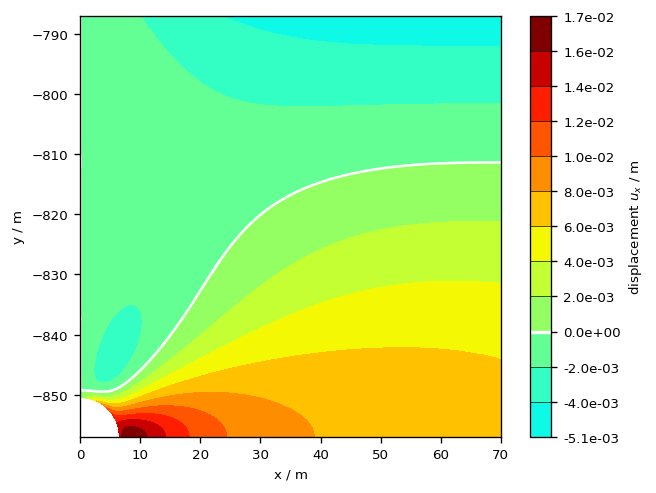

In [6]:
pvd = Path(out_dir, f"{output_prefix}.pvd")
ms = ot.MeshSeries(pvd).scale(time=("s", "d"))
print(pvd)
mesh_last = ms[-1]
fig = mesh_last.plot_contourf(
    ot.variables.displacement["x"],
    figsize=(6, 4),
    fontsize=8,
    cmap="jet",
)

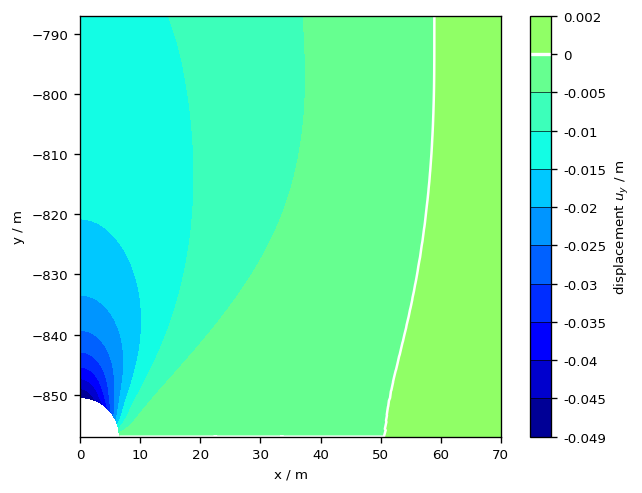

In [7]:
fig = mesh_last.plot_contourf(
    ot.variables.displacement["y"], figsize=(6, 4), fontsize=8, cmap="jet"
)

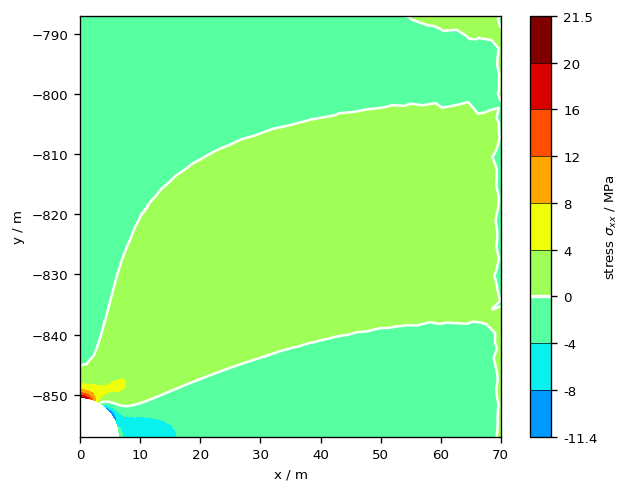

In [8]:
fig = mesh_last.plot_contourf(
    ot.variables.stress["xx"], figsize=(6, 4), fontsize=8, cmap="jet"
)

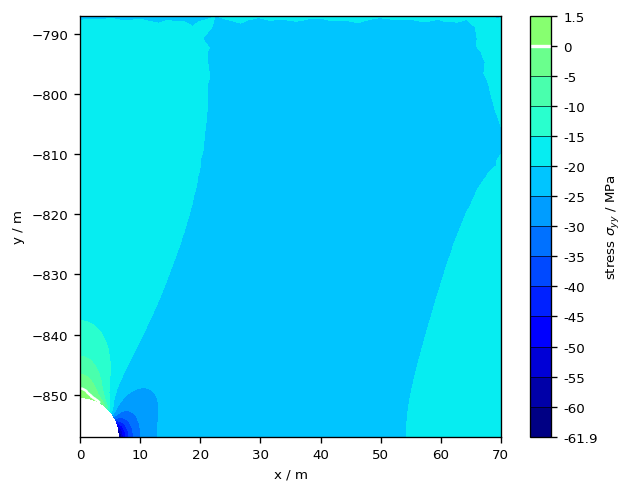

In [9]:
fig = mesh_last.plot_contourf(
    ot.variables.stress["yy"], figsize=(6, 4), fontsize=8, cmap="jet"
)

#### 5. Result comparison

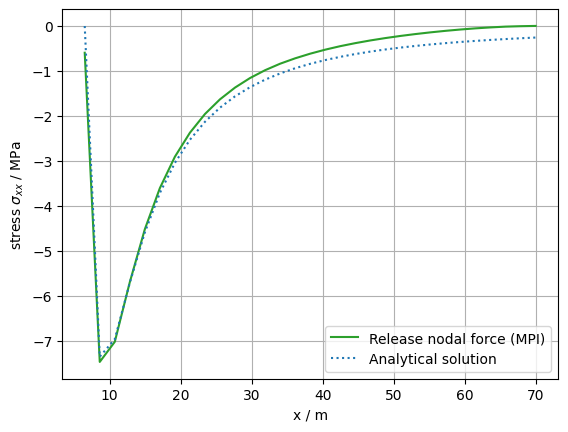

In [10]:
point_a = (6.5, -857.0, 0)
point_b = (70.0, -857.0, 0)
profile = ms[-1].sample_over_line(point_a, point_b, resolution=30)
xs = profile["Distance"] + 6.5
plt.plot(
    xs, profile["sigma"][:, 0] * 1e-6, color="C2", label="Release nodal force (MPI)"
)

a = 6.5
sigma_t = -20  # MPa
sigma_x_a = np.asarray(
    [0.5 * (3.0 * a * a / (r * r) - 3 * a**4 / (r**4)) * sigma_t for r in xs],
)
plt.plot(xs, sigma_x_a, linestyle="dotted", color="C0", label="Analytical solution")
plt.xlabel("x / m")
plt.ylabel(r"stress $\sigma_{xx}$ / MPa")
plt.legend()
plt.grid()
plt.show()

In the above figure, the radial stress $\sigma_r$ profiles along the $\theta = 0^\circ$ axis, obtained using the release nodal force approach,
and the analytical solution, are compared.

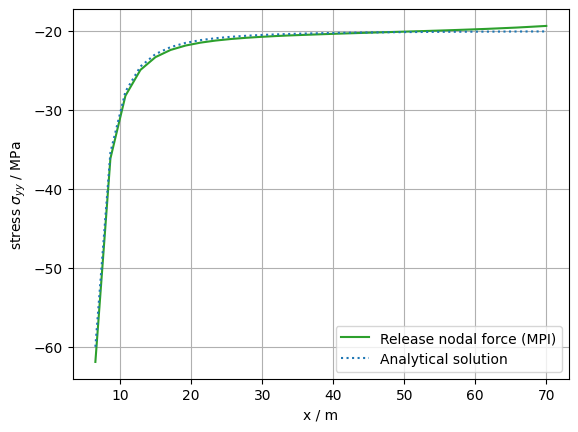

In [11]:
plt.plot(
    xs, profile["sigma"][:, 1] * 1e-6, color="C2", label="Release nodal force (MPI)"
)

a = 6.5
sigma_t = -20  # MPa
sigma_y_a = np.asarray(
    [0.5 * (2 + a * a / (r * r) + 3 * a**4 / (r**4)) * sigma_t for r in xs],
)
plt.plot(xs, sigma_y_a, linestyle="dotted", color="C0", label="Analytical solution")
plt.xlabel("x / m")
plt.ylabel(r"stress $\sigma_{yy}$ / MPa")
plt.legend()
plt.grid()
plt.show()

In the above two figures, the tangential stress $\sigma_{\theta}$ profiles along the $\theta = 0^\circ$ axis,
obtained using the release nodal force approach, and the analytical solution, are compared.

In [12]:
expected_sigma = np.asarray(
    [
        [-5.94322287e05, -6.19135039e07, -1.27523478e07, 2.88857972e04],
        [-7.47350139e06, -3.61722449e07, -7.09372389e06, -4.31847097e03],
        [-7.02632921e06, -2.82291119e07, -4.57663234e06, -3.04634647e03],
        [-5.69811254e06, -2.49548130e07, -3.19587766e06, -2.33539317e03],
        [-4.52129471e06, -2.33397674e07, -2.35831864e06, -1.87907695e03],
        [-3.60618350e06, -2.24352157e07, -1.81241976e06, -1.49642711e03],
        [-2.90810489e06, -2.18773279e07, -1.43562983e06, -1.21999451e03],
        [-2.37358359e06, -2.15068967e07, -1.16414410e06, -1.00559463e03],
        [-1.95790335e06, -2.12450510e07, -9.60886316e05, -8.50316451e02],
        [-1.63102314e06, -2.10507797e07, -8.04540863e05, -7.21601922e02],
        [-1.36956366e06, -2.08999790e07, -6.80862806e05, -6.21075254e02],
        [-1.15718662e06, -2.07782330e07, -5.80625884e05, -5.47100152e02],
        [-9.83183398e05, -2.06769008e07, -4.98025268e05, -4.73813630e02],
        [-8.38590438e05, -2.05896257e07, -4.28464851e05, -2.91454098e02],
        [-7.18847960e05, -2.05193954e07, -3.71473022e05, -5.83689809e02],
        [-6.15597155e05, -2.04493120e07, -3.19472761e05, -2.60734404e02],
        [-5.26222722e05, -2.03832868e07, -2.72852858e05, -1.22193725e02],
        [-4.48460991e05, -2.03225868e07, -2.31314329e05, -1.40384160e02],
        [-3.81052951e05, -2.02633176e07, -1.93311164e05, 8.27105977e00],
        [-3.21267935e05, -2.02058999e07, -1.58150365e05, 1.25229397e02],
        [-2.68380912e05, -2.01489856e07, -1.25209966e05, -2.03819778e02],
        [-2.21121750e05, -2.00919675e07, -9.39267720e04, -5.98779759e02],
        [-1.79147229e05, -2.00335377e07, -6.38054888e04, 6.67763887e02],
        [-1.41291420e05, -1.99727511e07, -3.42127668e04, -2.09343375e02],
        [-1.07444543e05, -1.99093000e07, -5.02336097e03, -6.12146069e02],
        [-7.76109665e04, -1.98407209e07, 2.45004314e04, -3.90010177e02],
        [-5.18790616e04, -1.97699451e07, 5.34527661e04, -3.13328250e02],
        [-3.10211876e04, -1.96869485e07, 8.46090962e04, -3.15443053e01],
        [-1.35909887e04, -1.96029252e07, 1.15045144e05, 3.61051256e02],
        [-4.03024845e03, -1.94999513e07, 1.48805539e05, 7.61397500e02],
        [2.04509604e03, -1.93933612e07, 1.82605155e05, 2.68937637e03],
    ]
)

computed_sigma = np.asarray(profile["sigma"])
np.testing.assert_allclose(actual=computed_sigma, desired=expected_sigma, atol=1e-10)

In [13]:
profile_1 = ms[1].sample_over_line(point_a, point_b, resolution=20)

In [14]:
expected_sigma_at_time_step1 = np.asarray(
    [
        [-3.43936509e04, -2.24255500e07, -7.37983093e05, 1.67163178e03],
        [-4.35117232e05, -2.06504420e07, -3.25667756e05, -2.12390771e02],
        [-3.29751883e05, -2.02867369e07, -1.84946624e05, -1.35150068e02],
        [-2.33407685e05, -2.01637005e07, -1.19132466e05, -9.66888540e01],
        [-1.68293107e05, -2.01086417e07, -8.30804300e04, -7.06015339e01],
        [-1.24599311e05, -2.00790254e07, -6.10874003e04, -5.33395317e01],
        [-9.43879134e04, -2.00608090e07, -4.65590777e04, -4.17593705e01],
        [-7.28030052e04, -2.00483867e07, -3.63569215e04, -3.36367087e01],
        [-5.68971874e04, -2.00391725e07, -2.88209067e04, -2.74197703e01],
        [-4.50766486e04, -2.00321132e07, -2.31569574e04, -8.97500479e01],
        [-3.56248353e04, -2.00260019e07, -1.84880070e04, -1.50887965e01],
        [-2.81301938e04, -2.00204214e07, -1.45654912e04, 1.01901038e01],
        [-2.20516754e04, -2.00152383e07, -1.11869887e04, 4.78649292e-01],
        [-1.70045020e04, -2.00102692e07, -8.18211982e03, 8.83595571e00],
        [-1.27963975e04, -2.00053222e07, -5.43557708e03, -3.46516064e01],
        [-9.25396696e03, -2.00002131e07, -2.84010683e03, 2.65168603e01],
        [-6.21785551e03, -1.99947512e07, -2.90703760e02, -3.54251197e01],
        [-3.71622809e03, -1.99887338e07, 2.26497684e03, -1.92526923e01],
        [-1.79520762e03, -1.99818836e07, 4.89635973e03, -1.82548063e00],
        [-4.84662002e02, -1.99740677e07, 7.63428203e03, 2.14277079e01],
        [1.18350465e02, -1.99648936e07, 1.05674280e04, 1.55635206e02],
    ]
)
computed_sigma_t1 = np.asarray(profile_1["sigma"])
np.testing.assert_allclose(
    actual=computed_sigma_t1, desired=expected_sigma_at_time_step1, atol=1e-10
)